Теория: 

**ОПИСАТЕЛЬНЫЕ СТАТИСТИКИ** - используются, чтобы описать типичное значение в данных. 

**Меры центральной тенденции**
1. Среднее арифметическое - для *количественных признаков и категориальных бинарных*. *Не устойчива к выбросам*
2. Медиана - для *количественных признаков*, *устойчива к выбросам*
3. Мода - для *категориальных признаков*, *количественных значений для подсчета частоты*

**Распределение данных**
1. Симметричные распределения: либо среднее == моде == медиане. Либо среднее == медиане и две моды - бимодальное распределение.
2. Ассиметричные распределения
- Правосторонняя ассиметрия - хвост двигается в правую сторону (может быть бимодальное распределение)
- Левосторонняя ассиметрия - хвост двигается в левую сторону (может быть бимодальное распределение)


Выбросы - экстремальные значения. Их важно удалять, чтобы работать с основной массой данных, и чтобы они не влияли на различные меры. 

Два метода для удаления выбросов: 
1. Метод N стандартных отклонений - находим левую и правую границу через формулу: mean +- N * std. Все, что вошло в границы - нормальные данные
2. Метод 1,5 межквартальных размаха - находим левую и правую границу через формулу: *Q1 - 1.5 * IQR*, *Q3 + 1.5 * IQR*

# если хотим посмотреть только на выбросы, то используем *df[df["признак"].between(left, right) **== False**]* либо *df[(df["признак"] < left) | (df["признак"] > right)]*

**ЯЩИК С УСАМИ**
- В середине медиана, 
- границы - Q1 и Q3, их рпазница - IQR
- ящик - межквартальные размахи
- самые левый и правый выбросы - min, max соотв

**ПРОПУСКИ**
- доля считается, как *df.isna().mean()*
- для удаления столбца: df.drop("признак", axis=1)

In [38]:
import pandas as pd
import numpy as np

In [39]:
df = pd.read_csv("/Users/nickolaykrasnenko/Documents/GitHub/SnowFlake/Python_Analysis/Pandas_practice/Practice3/bank_data.csv")

In [40]:
round(df.isna().sum() / df.isna().count() * 100, 2)
df

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_CREDIT,AMT_ANNUITY,CODE_GENDER,AGE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,AMT_INCOME_TOTAL,TARGET
0,230160,Cash loans,162000.0,12928.5,M,54.0,Widow,House / apartment,Working,67500.0,0
1,199156,Cash loans,253737.0,20178.0,F,50.0,Married,Rented apartment,Unemployed,45000.0,0
2,379007,Cash loans,126000.0,8203.5,F,33.0,Married,House / apartment,Unemployed,67500.0,0
3,109133,Cash loans,679500.0,27076.5,F,59.0,Married,House / apartment,Unemployed,121500.0,0
4,302937,Cash loans,193392.0,7420.5,F,61.0,Widow,House / apartment,Working,166500.0,0
...,...,...,...,...,...,...,...,...,...,...,...
9991,425676,Cash loans,352044.0,17122.5,F,38.0,Separated,House / apartment,Businessman,247500.0,0
9992,372546,Cash loans,545040.0,19705.5,F,51.0,Separated,House / apartment,Working,121500.0,0
9993,152089,Cash loans,1006069.5,36265.5,F,26.0,Married,House / apartment,Businessman,270000.0,0
9994,150977,Cash loans,135000.0,14670.0,M,28.0,Married,House / apartment,Businessman,225000.0,0


In [41]:
age_clean_isna = df.groupby("NAME_CONTRACT_TYPE")["AGE"].transform("mean")

age_clean_isna = df["AGE"].mean()

df["AGE_CLEAN"] = df["AGE"].fillna(age_clean_isna)

round(df["AGE_CLEAN"].var(), 2)

140.17

In [42]:
code_gen_max = df["CODE_GENDER"].value_counts().idxmax()

df["CODE_GENDER_CLEAN"] = df["CODE_GENDER"].fillna(code_gen_max)

df[(df["CODE_GENDER_CLEAN"] == "F") & (df["NAME_FAMILY_STATUS"] == "Civil marriage")].shape[0]

658

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='CODE_INCOME'>

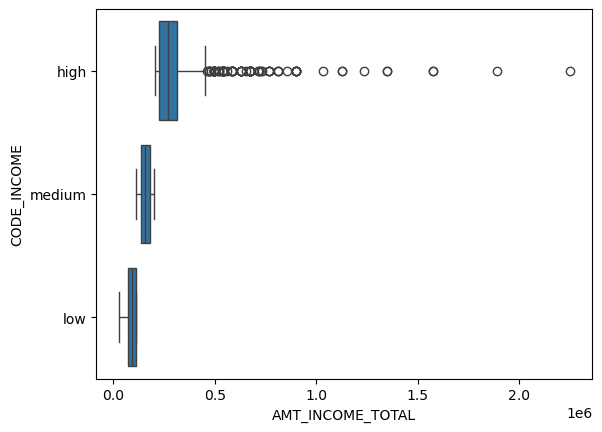

In [43]:
Q1 = df["AMT_INCOME_TOTAL"].quantile(0.25)
Q3 = df["AMT_INCOME_TOTAL"].quantile(0.75)


def func(x):
    if x <= Q1:
        return "low"
    elif x <= Q3:
        return "medium"
    else:
        return "high"
        
        
df["CODE_INCOME"] = df["AMT_INCOME_TOTAL"].apply(func)

from tkinter import VERTICAL
import seaborn as sns
order_list = ['high', 'medium', 'low']
sns.boxplot(data=df, x="AMT_INCOME_TOTAL", y="CODE_INCOME", order=order_list)

In [44]:
par3 = df.groupby("CODE_INCOME")["AMT_CREDIT"].agg("var")

par3.sort_values(ascending=False)

CODE_INCOME
high      2.418511e+11
medium    1.382495e+11
low       8.207722e+10
Name: AMT_CREDIT, dtype: float64

In [45]:
median_code = df.groupby("CODE_INCOME")["AMT_CREDIT"].transform("median")

df["AMT_CREDIT_CLEAN"] = df["AMT_CREDIT"].fillna(median_code)

round(df["AMT_CREDIT_CLEAN"].mean(), 2)

600105.09

<Axes: ylabel='NAME_INCOME_TYPE'>

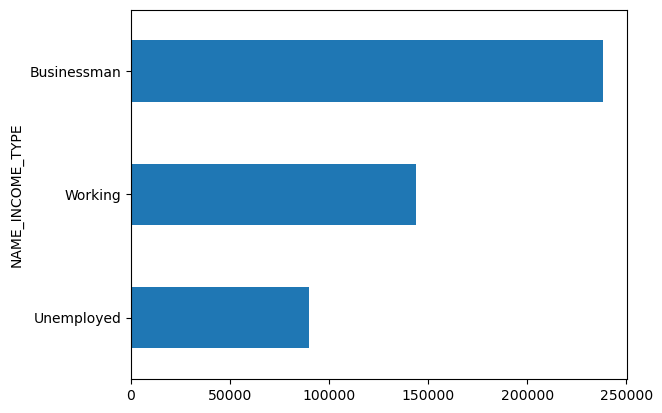

In [46]:
par4 = df.groupby("NAME_INCOME_TYPE")["AMT_INCOME_TOTAL"].median()

par4.sort_values().plot.barh()

In [47]:
mode_code = df.groupby("CODE_INCOME")["NAME_INCOME_TYPE"].transform(lambda x: x.mode()[0])

df["NAME_INCOME_TYPE_CLEAN"] = df["NAME_INCOME_TYPE"].fillna(mode_code)

round(df[(df["NAME_INCOME_TYPE_CLEAN"] == "Working") & (df["CODE_INCOME"] == "medium")]["AMT_CREDIT_CLEAN"].mean(), 2)

601053.37

63.16

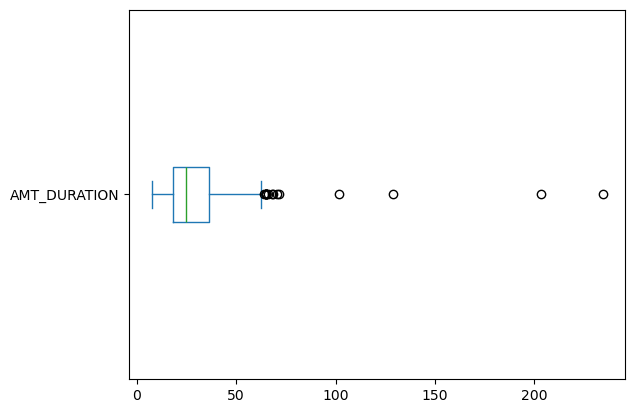

In [48]:
df["AMT_DURATION"] = - np.log(1 - ((0.2/12 * df["AMT_CREDIT_CLEAN"]))/df["AMT_ANNUITY"])/np.log(1 + 0.2/12)

df["AMT_DURATION"].plot(kind="box", vert=False)

IQR = df["AMT_DURATION"].quantile(0.75) - df["AMT_DURATION"].quantile(0.25)

round(df["AMT_DURATION"].agg(lambda x: x.quantile(0.75) + 1.5 * IQR), 2)

In [49]:
df["AMT_DURATION"].max()

234.40637159531

In [50]:
Q1_low = df["AMT_DURATION"].quantile(0.25) - 1.5 * IQR
Q3_high = df["AMT_DURATION"].quantile(0.75) + 1.5 * IQR


temp = df.copy()

temp = temp[temp["AMT_DURATION"].between(Q1_low, Q3_high)]

<Axes: ylabel='Frequency'>

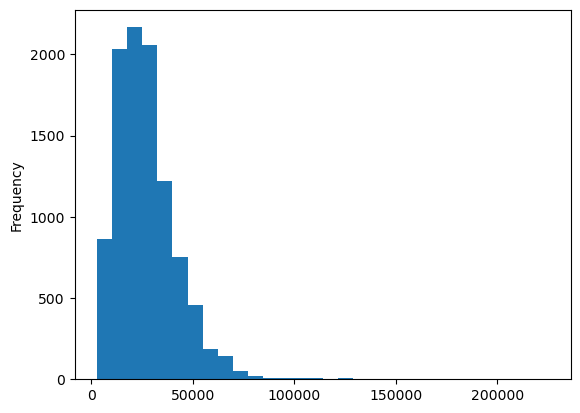

In [51]:
temp["ln_AMT_ANNUITY"] = np.log(temp["AMT_ANNUITY"])

temp["AMT_ANNUITY"].plot.hist(bins=30)

In [52]:
std_low = temp['ln_AMT_ANNUITY'].mean() - 2 * temp['ln_AMT_ANNUITY'].std()
std_high = temp['ln_AMT_ANNUITY'].mean() + 2 * temp['ln_AMT_ANNUITY'].std()


df_clean = temp[temp['ln_AMT_ANNUITY'].between(std_low, std_high)]

df_clean.shape[0]

9562

<Axes: xlabel='AMT_CREDIT_CLEAN', ylabel='NAME_CONTRACT_TYPE'>

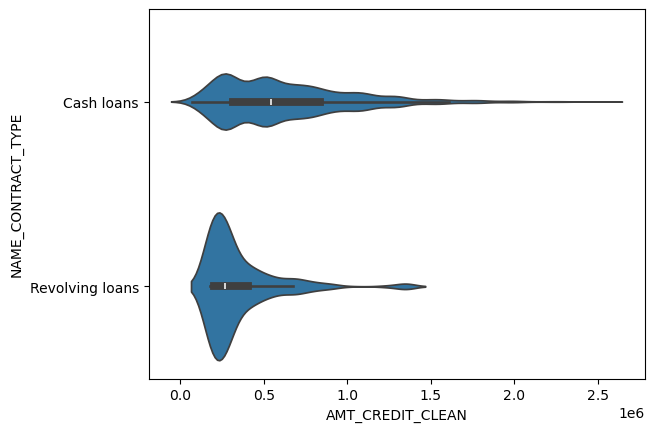

In [53]:
sns.violinplot(data=df_clean, x='AMT_CREDIT_CLEAN', y='NAME_CONTRACT_TYPE')


In [54]:
df_clean.groupby("NAME_CONTRACT_TYPE")['AMT_CREDIT_CLEAN'].median()

NAME_CONTRACT_TYPE
Cash loans         541224.0
Revolving loans    270000.0
Name: AMT_CREDIT_CLEAN, dtype: float64

In [55]:
df_clean["AMT_CREDIT"].max() - df_clean["AMT_CREDIT"].min()

2445345.0

In [56]:
mean_df = df_clean["AMT_ANNUITY"].mean()

df_clean["AMT_ANNUITY_av_dev"] = df_clean["AMT_ANNUITY"].apply(lambda x: abs(mean_df - x))

round(df_clean["AMT_ANNUITY_av_dev"].mean(), 2)

/var/folders/nx/gz3nx61j43sgg1vjqk1pfrtm0000gn/T/ipykernel_18190/829827788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["AMT_ANNUITY_av_dev"] = df_clean["AMT_ANNUITY"].apply(lambda x: abs(mean_df - x))


10186.76

In [57]:
df_clean["NAME_FAMILY_STATUS"].value_counts()

NAME_FAMILY_STATUS
Married                 6109
Single / not married    1448
Civil marriage           897
Separated                632
Widow                    476
Name: count, dtype: int64

In [58]:
df_clean["TARGET"].value_counts(normalize=True)

TARGET
0    0.91529
1    0.08471
Name: proportion, dtype: float64

In [59]:
df_clean['AMT_INCOME_TOTAL'].quantile(0.5)

157500.0

In [60]:
df_clean.groupby("NAME_HOUSING_TYPE")["NAME_HOUSING_TYPE"].count()

NAME_HOUSING_TYPE
Co-op apartment          41
House / apartment      8494
Municipal apartment     335
Office apartment         88
Rented apartment        138
With parents            466
Name: NAME_HOUSING_TYPE, dtype: int64

In [61]:
mean_amt = df_clean["AMT_INCOME_TOTAL"].mean()

round(df_clean[df["CODE_GENDER"] == "F"]["AMT_INCOME_TOTAL"].apply(lambda x: abs(mean_amt - x) ** 2).mean(), 2)

/var/folders/nx/gz3nx61j43sgg1vjqk1pfrtm0000gn/T/ipykernel_18190/2311823294.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  round(df_clean[df["CODE_GENDER"] == "F"]["AMT_INCOME_TOTAL"].apply(lambda x: abs(mean_amt - x) ** 2).mean(), 2)


7125123638.55

In [62]:
df_clean

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_CREDIT,AMT_ANNUITY,CODE_GENDER,AGE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,AMT_INCOME_TOTAL,TARGET,AGE_CLEAN,CODE_GENDER_CLEAN,CODE_INCOME,AMT_CREDIT_CLEAN,NAME_INCOME_TYPE_CLEAN,AMT_DURATION,ln_AMT_ANNUITY,AMT_ANNUITY_av_dev
0,230160,Cash loans,162000.0,12928.5,M,54.0,Widow,House / apartment,Working,67500.0,0,54.0,M,low,162000.0,Working,14.172180,9.467189,14277.087691
1,199156,Cash loans,253737.0,20178.0,F,50.0,Married,Rented apartment,Unemployed,45000.0,0,50.0,F,low,253737.0,Unemployed,14.228891,9.912348,7027.587691
2,379007,Cash loans,126000.0,8203.5,F,33.0,Married,House / apartment,Unemployed,67500.0,0,33.0,F,low,126000.0,Unemployed,17.889353,9.012316,19002.087691
3,109133,Cash loans,679500.0,27076.5,F,59.0,Married,House / apartment,Unemployed,121500.0,0,59.0,F,medium,679500.0,Unemployed,32.773955,10.206421,129.087691
5,248909,Cash loans,1422337.5,39244.5,F,57.0,Married,House / apartment,Working,225000.0,0,57.0,F,high,1422337.5,Working,56.049939,10.577567,12038.912309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,425676,Cash loans,352044.0,17122.5,F,38.0,Separated,House / apartment,Businessman,247500.0,0,38.0,F,high,352044.0,Businessman,25.383530,9.748149,10083.087691
9992,372546,Cash loans,545040.0,19705.5,F,51.0,Separated,House / apartment,Working,121500.0,0,51.0,F,medium,545040.0,Working,37.389210,9.888653,7500.087691
9993,152089,Cash loans,1006069.5,36265.5,F,26.0,Married,House / apartment,Businessman,270000.0,0,26.0,F,high,1006069.5,Businessman,37.543730,10.498622,9059.912309
9994,150977,Cash loans,135000.0,14670.0,M,28.0,Married,House / apartment,Businessman,225000.0,0,28.0,M,high,135000.0,Businessman,10.072810,9.593560,12535.587691


In [63]:
noway = df_clean[df_clean["NAME_FAMILY_STATUS"].isin(["Married", "Civil marriage"])]["AGE"]

noway.quantile(0.75) - noway.quantile(0.25)

18.0

In [64]:
df_clean["NAME_HOUSING_TYPE"].mode()[0]

'House / apartment'

In [65]:
mean_tf = df_clean["AMT_CREDIT"].mean()

df_clean[df_clean["AMT_CREDIT"] < mean_tf]["AMT_INCOME_TOTAL"].mode()[0]

135000.0

In [66]:
df_clean.groupby("NAME_HOUSING_TYPE")["AMT_INCOME_TOTAL"].agg(lambda x: x.max() - x.min()).sort_values(ascending=False)

NAME_HOUSING_TYPE
House / apartment      2223000.0
Municipal apartment    1545750.0
With parents            680310.0
Rented apartment        630000.0
Office apartment        495000.0
Co-op apartment         472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [67]:
def func(x):
    return x.quantile(0.75) - x.quantile(0.25)

df_clean.groupby("NAME_INCOME_TYPE")["AMT_INCOME_TOTAL"].agg(func).sort_values()

NAME_INCOME_TYPE
Unemployed     54000.0
Working        58500.0
Businessman    67500.0
Name: AMT_INCOME_TOTAL, dtype: float64